In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
class_names = ['APPLE', 'BANANA', 'ORANGE']

In [3]:
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []

In [77]:
#getting the referrence to webcam

camera = cv2.VideoCapture(0)
camera_height = 500


while(True):
    # reading the camera
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)
    
    #rescasle the camera output
    aspect = frame.shape[1]/float(frame.shape[0])
    res = int(aspect* camera_height)#landscape orientation
    frame = cv2.resize(frame, (res,camera_height))
    
    #add rectangel
    cv2.rectangle(frame, (300,75), (650,425), (0,255,0), 2)
    
    #show the frame
    cv2.imshow("Capturing frames", frame)
    
    key = cv2.waitKey()
    
    
    #quit cam when q is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        raw_frames_type_2.append(frame)
        print('1 key pressed - saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        raw_frames_type_3.append(frame)
        print('1 key pressed - saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        raw_frames_type_4.append(frame)
        print('1 key pressed - saved TYPE_4 frame')
        
camera.release()
cv2.destroyAllWindows()
    

1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame
1 key pressed - saved TYPE_1 frame


In [4]:
width = 96
height = 96

In [5]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(frame, (width,height))
    cv2.imwrite('T1/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(frame, (width,height))
    cv2.imwrite('T2/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(frame, (width,height))
    cv2.imwrite('T3/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    
for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(frame, (width,height))
    cv2.imwrite('T4/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [6]:
from glob import glob
from tensorflow.keras import preprocessing

# load_image_type_1
image_type_1 = []
for image_path in glob('T1/*.*'):
    image = preprocessing.image.load_img(image_path, target_size =(width,height))
    x = preprocessing.image.img_to_array(image)
    image_type_1.append(x)

# load_image_type_2
image_type_2 = []
for image_path in glob('T2/*.*'):
    image = preprocessing.image.load_img(image_path, target_size =(width,height))
    x = preprocessing.image.img_to_array(image)
    image_type_2.append(x)

# load_image_type_3
image_type_3 = []
for image_path in glob('T3/*.*'):
    image = preprocessing.image.load_img(image_path, target_size =(width,height))
    x = preprocessing.image.img_to_array(image)
    image_type_3.append(x)
    
# load_image_type_4
image_type_4 = []
for image_path in glob('T4/*.*'):
    image = preprocessing.image.load_img(image_path, target_size =(width,height))
    x = preprocessing.image.img_to_array(image)
    image_type_4.append(x)

/Users/vishaljha/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


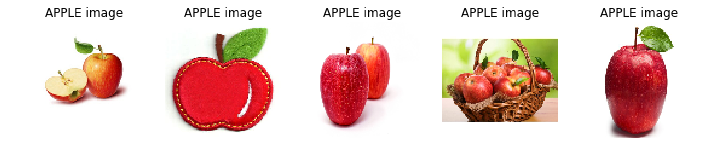

In [7]:
plt.figure(figsize = (12,8))

#to display first 5 images of a type 1 dataset
for i, x in enumerate(image_type_1[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))
    
#show the plot
plt.show()

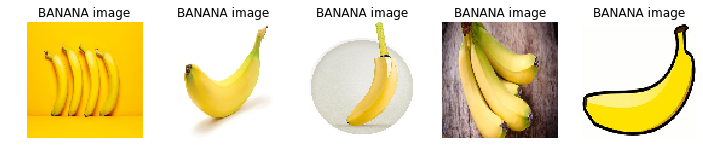

In [8]:
plt.figure(figsize = (12,8))

#to display first 5 images of a type 2 dataset
for i, x in enumerate(image_type_2[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))
    
#show the plot
plt.show()

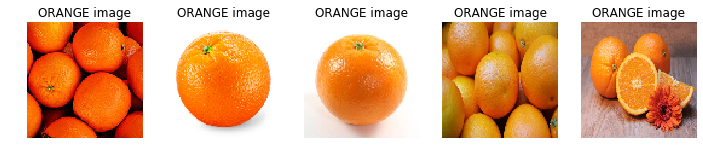

In [9]:
plt.figure(figsize = (12,8))

#to display first 5 images of a type 3 dataset
for i, x in enumerate(image_type_3[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[2]))
    
#show the plot
plt.show()

In [10]:
plt.figure(figsize = (12,8))

#to display first 5 images of a type 4 dataset
for i, x in enumerate(image_type_4[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[3]))
    
#show the plot
plt.show()

<Figure size 864x576 with 0 Axes>

In [12]:
#images as tensors

X_type_1 = np.array(image_type_1)
X_type_2 = np.array(image_type_2)
X_type_3 = np.array(image_type_3)
X_type_4 = np.array(image_type_4)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)

(71, 96, 96, 3)
(69, 96, 96, 3)
(68, 96, 96, 3)


In [13]:
X = np.concatenate((X_type_1, X_type_2), axis = 0)

if len(X_type_3):
    X = np.concatenate((X, X_type_3), axis =0)
    
#scale the data to[0,1] values
X = X/ 255.
X.shape

(208, 96, 96, 3)

In [14]:
from tensorflow.keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]

y = np.concatenate((y_type_1 ,y_type_2), axis=0)

if len(y_type_3):
    y = np.concatenate((y, y_type_3), axis = 0)

y = to_categorical(y,num_classes=len(class_names))
print(y.shape)
print(y)

(208, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

#default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop, 
               dense_1_n=dense_1_n, dense_1_drop=dense_1_drop, 
               dense_2_n=dense_2_n, dense_2_drop=dense_2_drop, 
               lr =lr):
    model = Sequential()
    
    model.add(Convolution2D(conv_1, (3, 3), 
                           input_shape=(width, height, color_channels),
                           activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))
    
    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
    
    model.add(Flatten())
    
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))
     
    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))
    
    model.add(Dense(len(class_names), activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(lr=lr),
                 metrics=('accuracy'))
    
    
    return model

In [16]:
import numpy as np
np.random.seed(1) # for reproductibility

#model with base parameters
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

In [17]:
model.fit(X,y,epochs=epochs)

Epoch 1/30
7/7 [==============================] - 2s 312ms/step - loss: 4.0710 - accuracy: 0.2837
Epoch 2/30
7/7 [==============================] - 2s 308ms/step - loss: 1.3862 - accuracy: 0.3413
Epoch 3/30
7/7 [==============================] - 2s 336ms/step - loss: 1.0841 - accuracy: 0.4038
Epoch 4/30
7/7 [==============================] - 2s 337ms/step - loss: 1.0503 - accuracy: 0.4471
Epoch 5/30
7/7 [==============================] - 2s 313ms/step - loss: 0.9472 - accuracy: 0.6827
Epoch 6/30
7/7 [==============================] - 2s 309ms/step - loss: 0.6962 - accuracy: 0.7644
Epoch 7/30
7/7 [==============================] - 2s 306ms/step - loss: 0.4518 - accuracy: 0.8510
Epoch 8/30
7/7 [==============================] - 2s 305ms/step - loss: 0.3049 - accuracy: 0.8846
Epoch 9/30
7/7 [==============================] - 2s 326ms/step - loss: 0.2309 - accuracy: 0.9231
Epoch 10/30
7/7 [==============================] - 2s 327ms/step - loss: 0.2112 - accuracy: 0.9375
Epoch 11/30
7/7 [==

In [18]:
import time

#reference to the cam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    #read a new frame
    _, frame = camera.read()
    
    #flip camera
    frame = cv2.flip(frame, 1)
    
    #rescaling frame
    aspect = frame.shape[1] /float(frame.shape[0])
    res = int(aspect * camera_height)#landscape
    frame = cv2.resize(frame, (res, camera_height))
    
    #add rectangle
    cv2.rectangle(frame, (300,75), (650,425), (0,255,0), 2)
    
    #get roi
    roi = frame[75+2:425-2, 300+2:650-2]
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (92,92))
    
    #predicting
    roi_X = np.expand_dims(roi, axis = 0)
    
    predicitons = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred, type_4_pred = predictions[0]

    #add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    type_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, type_2_text, (70, 200),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    type_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, type_3_text, (70, 230),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    type_4_text = '{}: {}%'.format(class_names[3], int(type_4_pred*100))
    cv2.putText(frame, type_4_text, (70, 260),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    cv2.imshow("Test out", frame)
    key = cv2.waitKey(1)
    
    
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows

ValueError: in user code:

    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/vishaljha/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 15488 but received input with shape [None, 14112]
